# Pymaceuticals Inc.
---

### Analysis

- From the data, I obseved the drug regimen used and which one was the most tested on the mice subjects. This drug was Capolmulin. There seemed to be an even split of female and meale mice subjects used. There was apositive correcaltion between the weight of the mouse and the average tumor Volume. The correlation reflected a correlation of 0.84.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(combined_data_df["Mouse ID"].unique())
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989"]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mice_id)==False]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
check_num_mice = len(cleaned_df["Mouse ID"].unique())
check_num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
standard_deviation = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
SEM = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({"Mean Tumor Volume":mean,
                        "Median Tumor Volum":median,
                        "Tumor Volume Variance":variance,
                        "Tumor Volume Std. Dev.":standard_deviation,
                        "Tummor Volume Std. Err":SEM})

summary

,Mean Tumor Volume,Median Tumor Volum,Tumor Volume Variance,Tumor Volume Std. Dev.,Tummor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = cleaned_df.groupby(["Drug Regimen"])[['Tumor Volume (mm3)']].agg(["mean", "median", "var", "std", "sem"])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Rows (Mouse ID/Timepoints) for each drug')

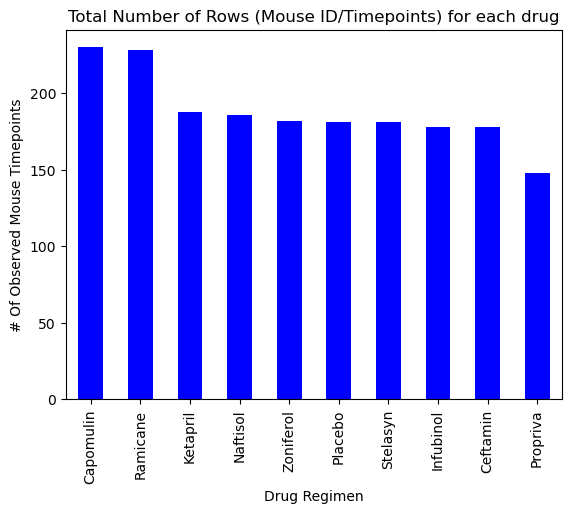

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
id_timepoints = cleaned_df["Drug Regimen"].value_counts()
plot_pandas = id_timepoints.plot(kind="bar", color="b")
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Timepoints")
plt.title("Total Number of Rows (Mouse ID/Timepoints) for each drug")

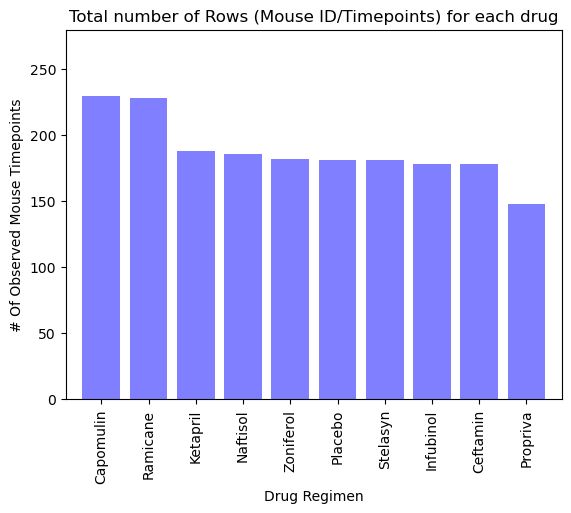

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(id_timepoints))
plt.bar(x_axis, id_timepoints, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"], rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(id_timepoints)+50)
plt.title("Total number of Rows (Mouse ID/Timepoints) for each drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Timepoints")
plt.show()

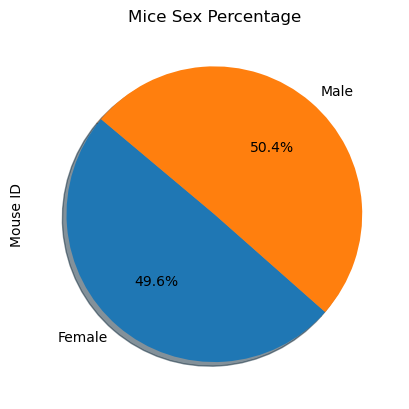

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = cleaned_df.groupby(["Sex"])["Mouse ID"].nunique()
mice_pie_chart = mice_gender.plot(kind="pie", title="Mice Sex Percentage", autopct="%1.1f%%", shadow=True, startangle=140)

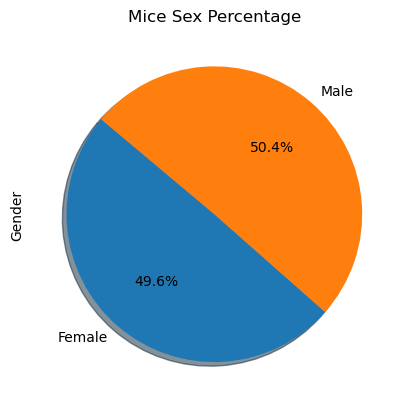

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ("Female", "Male")
plt.pie(mice_gender, autopct="%1.1f%%", labels=labels, shadow=True, startangle=140)
plt.title("Mice Sex Percentage")
plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
Ramicane = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane"]
Infubinol  = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol"]
Ceftamin  = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_Timepoint_Max = Capomulin.groupby('Mouse ID')['Timepoint'].max()
Capomulin_df = pd.DataFrame(Capomulin_Timepoint_Max)

Ramicane_Timepoint_Max = Ramicane.groupby('Mouse ID')['Timepoint'].max()
Ramicane_df = pd.DataFrame(Ramicane_Timepoint_Max)

Infubinol_Timepoint_Max = Infubinol.groupby('Mouse ID')['Timepoint'].max()
Infubinol_df = pd.DataFrame(Infubinol_Timepoint_Max)

Ceftamin_Timepoint_Max = Ceftamin.groupby('Mouse ID')['Timepoint'].max()
Ceftamin_df = pd.DataFrame(Ceftamin_Timepoint_Max)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_df, cleaned_df, on=("Mouse ID","Timepoint"),how="left")

Ramicane_merge = pd.merge(Ramicane_df, cleaned_df, on=("Mouse ID","Timepoint"),how="left")

Infubinol_merge = pd.merge(Infubinol_df, cleaned_df, on=("Mouse ID","Timepoint"),how="left")

Ceftamin_merge = pd.merge(Ceftamin_df, cleaned_df, on=("Mouse ID","Timepoint"),how="left")

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_TVolume = Capomulin_merge["Tumor Volume (mm3)"]

Ramicane_TVolume = Ramicane_merge["Tumor Volume (mm3)"]

Infubinol_TVolume = Infubinol_merge["Tumor Volume (mm3)"]

Ceftamin_TVolume = Ceftamin_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
quartiles = Capomulin_TVolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("-----------------------------------------------")

quartiles = Ramicane_TVolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("-----------------------------------------------")

quartiles = Infubinol_TVolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("-----------------------------------------------")

quartiles = Ceftamin_TVolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors is: {lowerq}")
print(f"The upper quartile of Ceftamin tumors is: {upperq}")
print(f"The interquartile range of Ceftamin tumors is: {iqr}")
print(f"The median of Ceftamin tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------------------
The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------------------------------
The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values abo

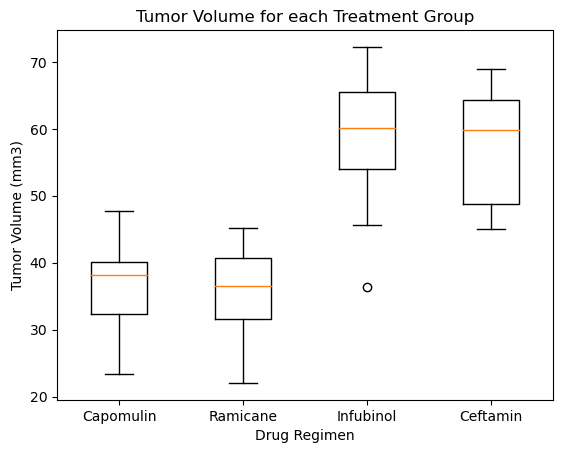

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = [Capomulin_TVolume, Ramicane_TVolume, Infubinol_TVolume, Ceftamin_TVolume]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for each Treatment Group')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(box_plot, labels=drugs)
plt.show()

## Line and Scatter Plots

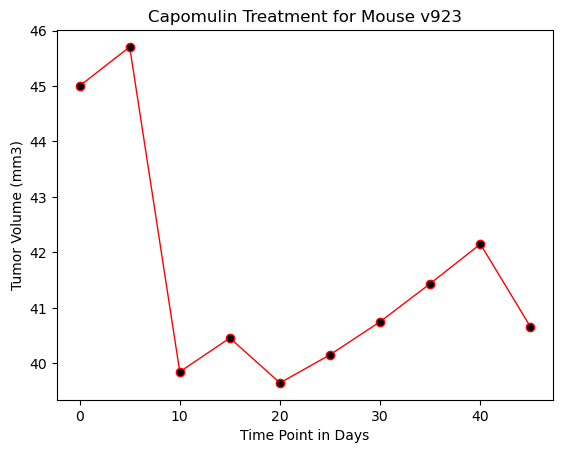

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Single_Mouse = cleaned_df[cleaned_df["Mouse ID"] == "v923"]
x_timepoint = Single_Mouse["Timepoint"]
y_tumor_volume = Single_Mouse["Tumor Volume (mm3)"]
plt.plot(x_timepoint, y_tumor_volume, color = "r", marker = "o", markerfacecolor = "black", linewidth = 1)
plt.title(f"Capomulin Treatment for Mouse v923")
plt.xlabel("Time Point in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

/var/folders/n7/nww4r0_j0sj48vdvj9qtm4lh0000gn/T/ipykernel_76622/2788641283.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capomulin_tumor_vol = Capomulin.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

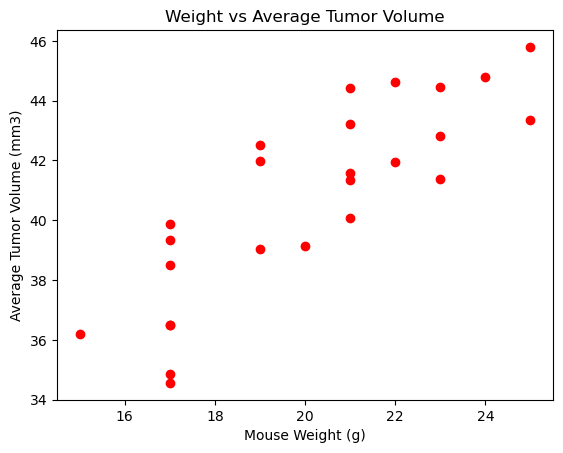

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capomulin_tumor_vol = Capomulin.groupby(['Mouse ID']).mean()
plt.scatter(avg_capomulin_tumor_vol['Weight (g)'],avg_capomulin_Tvol['Tumor Volume (mm3)'], color="red")
plt.title('Weight vs Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and average observed tumor volume is 0.84


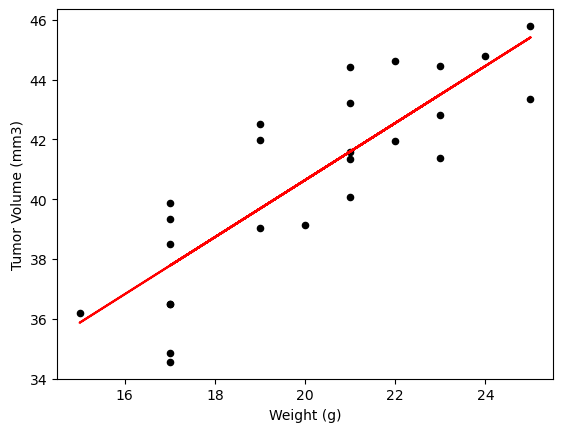

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_capomulin_tumor_vol.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", color="black")

correlation = avg_capomulin_tumor_vol["Weight (g)"].corr(avg_capomulin_tumor_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average observed tumor volume is {round(correlation,2)}")
      
(slope, intercept, r_value, p_value, std_err) = st.linregress(avg_capomulin_tumor_vol["Weight (g)"],avg_capomulin_tumor_vol["Tumor Volume (mm3)"])
regression_line = slope * avg_capomulin_tumor_vol["Weight (g)"] + intercept
plt.plot(avg_capomulin_tumor_vol["Weight (g)"], regression_line, color='red')
plt.show()